# Credit Card Transaction: EDA

The Credit Card Transactions Dataset provides detailed records of credit card transactions, including information about transaction times, amounts, and associated personal and merchant details.

In this notebook, exploratory data analysis (EDA) is done. It covers starting from simple correlation test between numerical features to side-by-side comparison between two classes of different features. As a target feature, "is_fraud" is taken.

At the end of the notebook, summery is given based on the analysis made.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import

In [2]:
df = pd.read_csv(
    "data/credit_card_transactions.csv",
    parse_dates= ["trans_date_trans_time", "dob"]
)

# drop columns
df.drop(columns= 
        [
            "Unnamed: 0", "merchant", "cc_num",
            "first", "last", "zip","trans_num",
            "unix_time", "merch_zipcode"
        ],
        inplace= True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   street                 1296675 non-null  object        
 5   city                   1296675 non-null  object        
 6   state                  1296675 non-null  object        
 7   lat                    1296675 non-null  float64       
 8   long                   1296675 non-null  float64       
 9   city_pop               1296675 non-null  int64         
 10  job                    1296675 non-null  object        
 11  dob                    1296675 non-null  datetime64[ns]
 12  merch_lat              12966

,trans_date_trans_time,category,amt,gender,street,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0
3,2019-01-01 00:01:16,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0
4,2019-01-01 00:03:06,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0


## Explore

In [3]:
# Create "age" column
df["age"]= [
    (x.year - y.year - ((x.day, x.month) < (y.day, y.month))) for x, y in zip(df["trans_date_trans_time"], df["dob"])
]

In [4]:
# check for multicollinearity
corr = df.select_dtypes("number").drop(columns= "is_fraud").corr()
corr

,amt,lat,long,city_pop,merch_lat,merch_long,age
amt,1.000000,-0.001926,-0.000187,0.005818,-0.001873,-0.000151,-0.009757
lat,-0.001926,1.000000,-0.015533,-0.155730,0.993592,-0.015509,0.048016
long,-0.000187,-0.015533,1.000000,-0.052715,-0.015452,0.999120,-0.029457
city_pop,0.005818,-0.155730,-0.052715,1.000000,-0.154781,-0.052687,-0.091893
merch_lat,-0.001873,0.993592,-0.015452,-0.154781,1.000000,-0.015431,0.047627
merch_long,-0.000151,-0.015509,0.999120,-0.052687,-0.015431,1.000000,-0.029382
age,-0.009757,0.048016,-0.029457,-0.091893,0.047627,-0.029382,1.000000


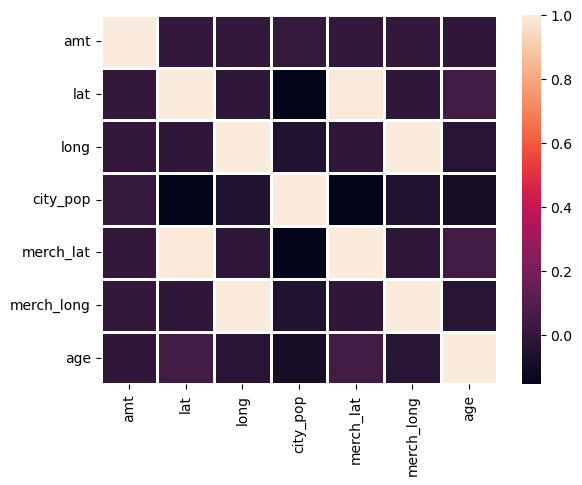

In [5]:
sns.heatmap(corr, linewidths= 1);

Features with high correlation:
* lat and merch_lat
* long and merch_long

So, drop either of one from each pair.

In [6]:
# Drop columns: multicolinarity
df.drop(columns= ["merch_lat", "merch_long",],
        inplace= True)
df.head()

,trans_date_trans_time,category,amt,gender,street,city,state,lat,long,city_pop,job,dob,is_fraud,age
0,2019-01-01 00:00:18,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0,30
1,2019-01-01 00:00:44,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,0,40
2,2019-01-01 00:00:51,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,0,56
3,2019-01-01 00:01:16,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,0,51
4,2019-01-01 00:03:06,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,0,32


In [7]:
# create dataframe containing only fraudulent transactions
df_fraud = df[df["is_fraud"] == 1]
df_fraud.head()

,trans_date_trans_time,category,amt,gender,street,city,state,lat,long,city_pop,job,dob,is_fraud,age
2449,2019-01-02 01:06:37,grocery_pos,281.06,M,542 Steve Curve Suite 011,Collettsville,NC,35.9946,-81.7266,885,Soil scientist,1988-09-15,1,30
2472,2019-01-02 01:47:29,gas_transport,11.52,F,27954 Hall Mill Suite 575,San Antonio,TX,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,1,58
2523,2019-01-02 03:05:23,grocery_pos,276.31,F,27954 Hall Mill Suite 575,San Antonio,TX,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,1,58
2546,2019-01-02 03:38:03,gas_transport,7.03,M,542 Steve Curve Suite 011,Collettsville,NC,35.9946,-81.7266,885,Soil scientist,1988-09-15,1,30
2553,2019-01-02 03:55:47,grocery_pos,275.73,F,27954 Hall Mill Suite 575,San Antonio,TX,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,1,58


In [8]:
# check for cardinality
df.select_dtypes("object").nunique()

category     14
gender        2
street      983
city        894
state        51
job         494
dtype: int64

In [9]:
df_fraud.select_dtypes("object").nunique()

category     14
gender        2
street      762
city        702
state        51
job         443
dtype: int64

Due to large numbers of values in street, city and job features, drop these columns to develop model, but here we keep these features for EDA.

### Transaction Amount
Here, transactions considered as fraud are taken. What amount of transaction were fraud?

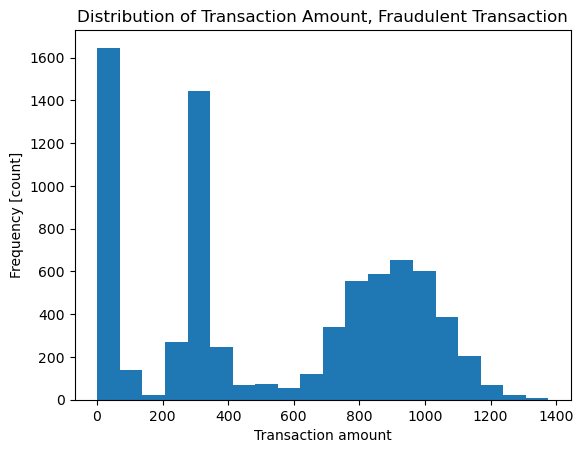

In [10]:
plt.hist(df_fraud["amt"], bins= 20)
plt.xlabel("Transaction amount")
plt.ylabel("Frequency [count]")
plt.title("Distribution of Transaction Amount, Fraudulent Transaction");

Let's consider the fraud amount to be greater than $400.

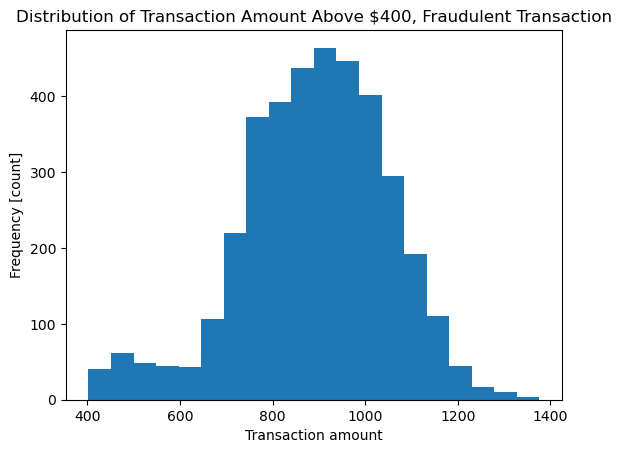

In [11]:
plt.hist(df_fraud[df_fraud["amt"] > 400]["amt"], bins= 20)
plt.xlabel("Transaction amount")
plt.ylabel("Frequency [count]")
plt.title("Distribution of Transaction Amount Above $400, Fraudulent Transaction");

In [12]:
df_fraud[df_fraud["amt"] > 400]["amt"].describe()

count    3749.000000
mean      891.388087
std       159.352752
min       402.390000
25%       791.910000
50%       901.200000
75%      1001.090000
max      1376.040000
Name: amt, dtype: float64

### Transaction Amount vs fraudulent transaction
Boxplots are used to see the ranges of transaction amounts based on the fraud and non-fraudulent transactions.

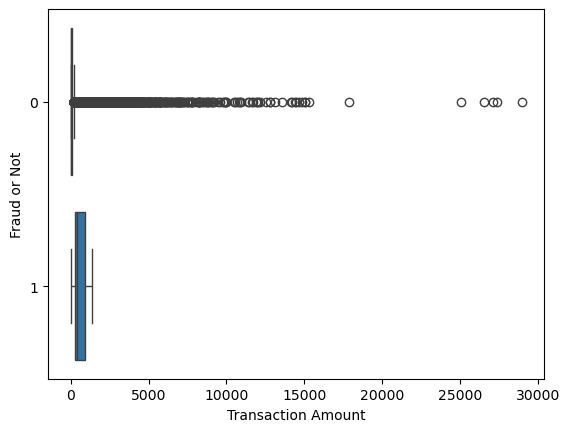

In [13]:
sns.boxplot(x= df["amt"], y= df["is_fraud"], orient= "h")
plt.xlabel("Transaction Amount")
plt.ylabel("Fraud or Not");

In [14]:
q1, q9 = df["amt"].quantile([0.1, 0.9])
mask = df["amt"].between(q1, q9)
df_cleaned = df[mask]

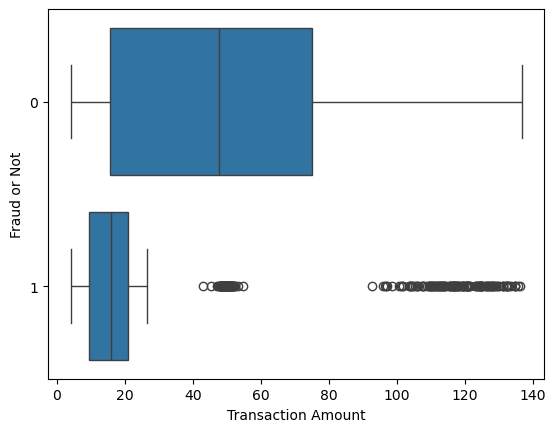

In [15]:
sns.boxplot(
    x= df_cleaned["amt"],
    y= df_cleaned["is_fraud"],
    orient= "h"
)
plt.xlabel("Transaction Amount")
plt.ylabel("Fraud or Not");

It is left skewed, as mean < median.

### Category vs fraudulent transaction
A dataframe grouped by fraud and non-fraudulent transaction is formed to see the type of categories to be dominating.

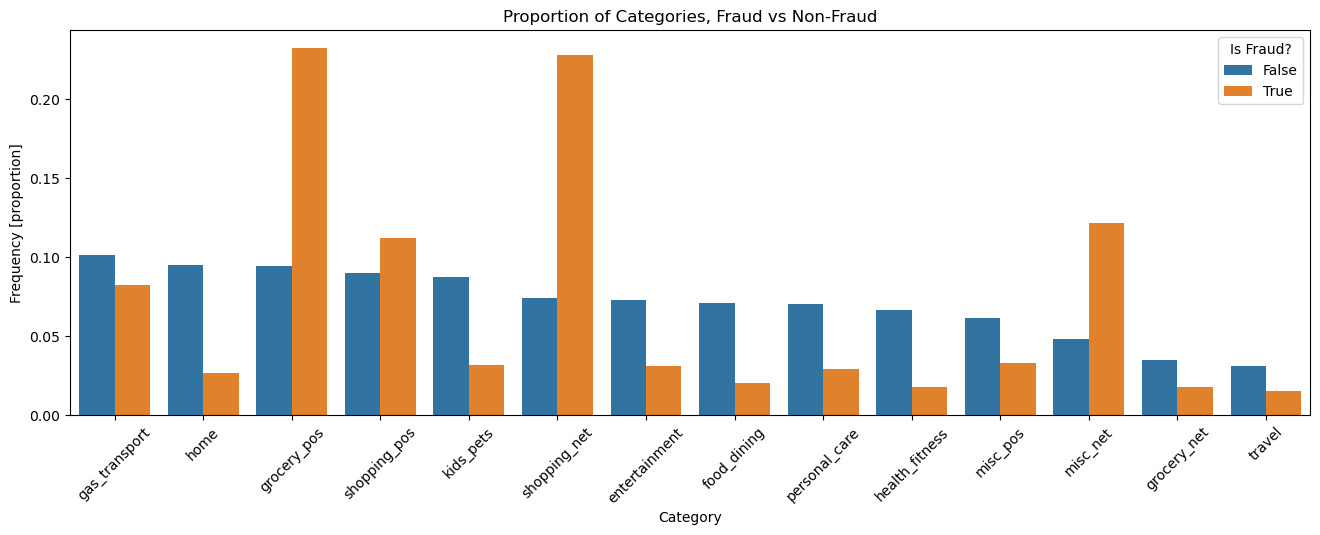

In [16]:
fig, ax = plt.subplots(figsize= (16, 5))
cat_counts = (
    df["category"]
    .groupby(df["is_fraud"])
    .value_counts(normalize= True)
    .to_frame()
    .reset_index()
)

sns.barplot(
    data= cat_counts,
    x= "category",
    y= "proportion",
    hue= "is_fraud",
    ax= ax,
)
plt.xticks(rotation= 45)
plt.xlabel("Category")
plt.ylabel("Frequency [proportion]")
plt.title("Proportion of Categories, Fraud vs Non-Fraud")

handles, labels = ax.get_legend_handles_labels()
plt.legend(title= "Is Fraud?", handles= handles, labels= ["False", "True"]);

### Age
Histograms are developed to see the distribution of age across the dataset and the fraud class.

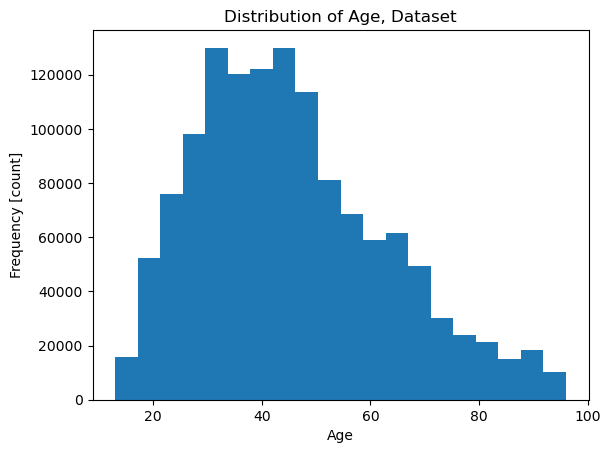

In [17]:
plt.hist(df["age"], bins= 20)
plt.xlabel("Age")
plt.ylabel("Frequency [count]")
plt.title("Distribution of Age, Dataset");

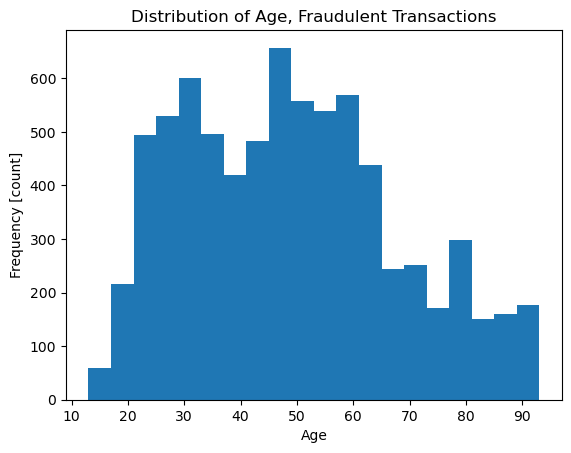

In [18]:
plt.hist(df_fraud["age"], bins= 20)
plt.xlabel("Age")
plt.ylabel("Frequency [count]")
plt.title("Distribution of Age, Fraudulent Transactions");

Text(0, 0.5, 'Is Fraud')

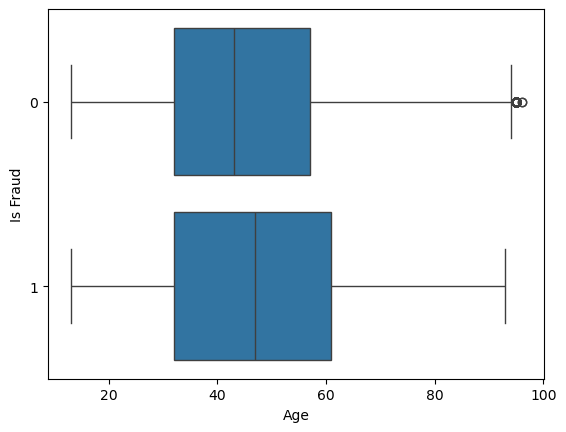

In [19]:
sns.boxplot(
    x= df["age"],
    y= df["is_fraud"],
    orient= "h"
)
plt.xlabel("Age")
plt.ylabel("Is Fraud")

### Gender
Comparison between the two genders is made based on fraud and non-fraudulent transactions.

In [20]:
df["gender"].value_counts()

gender
F    709863
M    586812
Name: count, dtype: int64

In [21]:
df["gender"].value_counts(normalize= True)

gender
F    0.547449
M    0.452551
Name: proportion, dtype: float64

In [22]:
gend_by_amt = df.groupby(["is_fraud", "gender"]).agg({"amt": "sum"})

gend_by_amt["perc"] = (
    gend_by_amt.groupby(level=0)
    .apply(lambda x: x*100 / x.sum())
    .round(3)
    .droplevel(level=0)
)

gend_by_amt = gend_by_amt.reset_index()

gend_by_amt

,is_fraud,gender,amt,perc
0,0,F,47987325.49,55.01
1,0,M,39247014.80,44.99
2,1,F,1845287.34,46.27
3,1,M,2142801.27,53.73


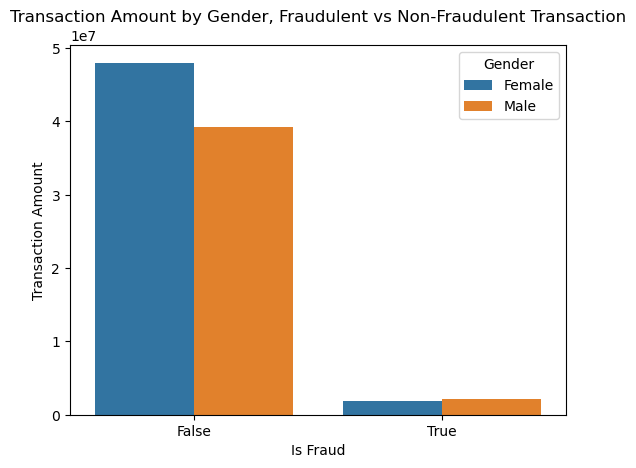

In [23]:
fig, ax = plt.subplots()
sns.barplot(
    data= gend_by_amt,
    x= "is_fraud",
    y= "amt",
    hue= "gender",
    ax= ax
)
plt.xticks(ticks= ["0", "1"], labels= ["False", "True"])
plt.xlabel("Is Fraud")
plt.ylabel("Transaction Amount")
handles, labels= ax.get_legend_handles_labels()
plt.legend(title= "Gender", handles= handles, labels= ["Female", "Male"])
plt.title("Transaction Amount by Gender, Fraudulent vs Non-Fraudulent Transaction");

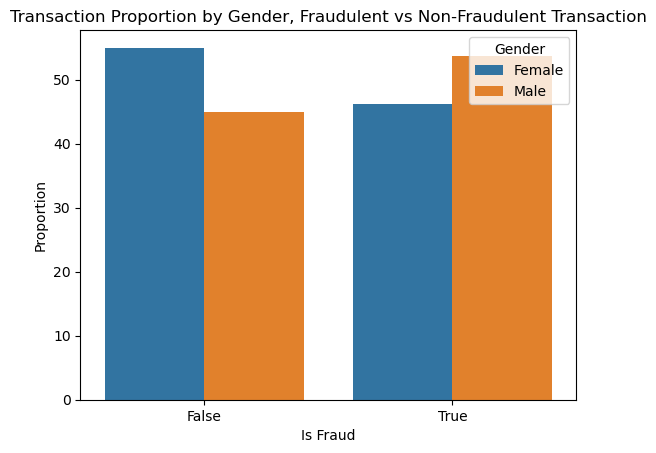

In [24]:
fig, ax = plt.subplots()
sns.barplot(
    data= gend_by_amt,
    x= "is_fraud",
    y= "perc",
    hue= "gender",
    ax= ax
)
plt.xticks(ticks= ["0", "1"], labels= ["False", "True"])
plt.xlabel("Is Fraud")
plt.ylabel("Proportion")
plt.title("Transaction Proportion by Gender, Fraudulent vs Non-Fraudulent Transaction")
handles, labels= ax.get_legend_handles_labels()
plt.legend(title= "Gender", handles= handles, labels= ["Female", "Male"]);

Fraudulent transactions were made more by male customers than by female customers.

### Job
The top 5 jobs from the overall dataset and the fraudulent transactions are taken to see the types of jobs for both groups.

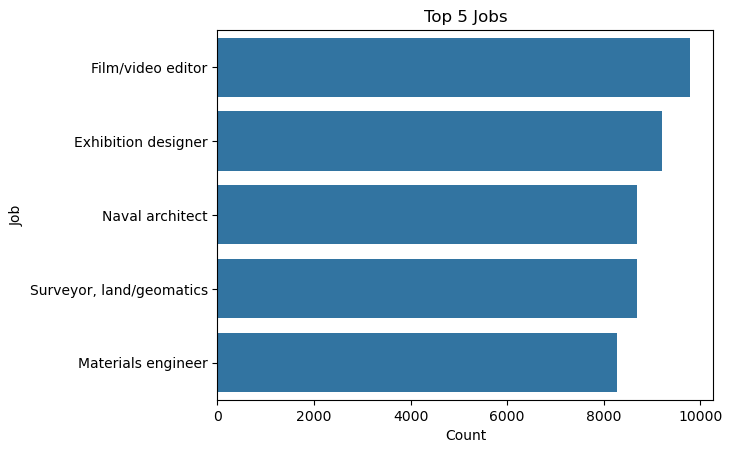

In [25]:
top_5_jobs = df["job"].value_counts().head()
sns.barplot(top_5_jobs, orient= "h")
plt.xlabel("Count")
plt.ylabel("Job")
plt.title("Top 5 Jobs");

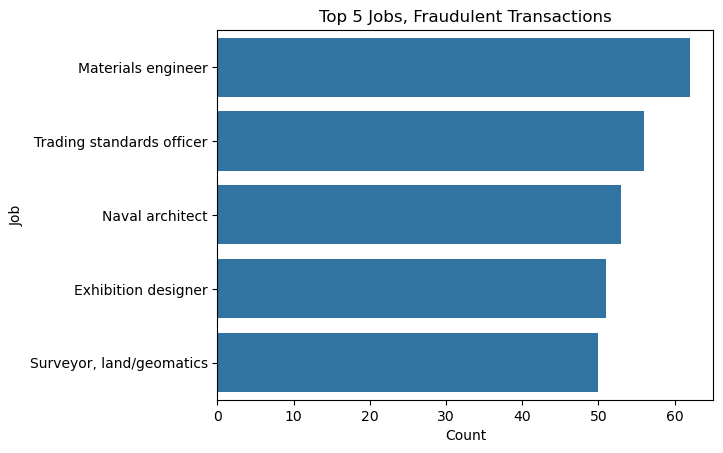

In [26]:
top_5_jobs_fraud = df_fraud["job"].value_counts().head()
sns.barplot(top_5_jobs_fraud, orient= "h")
plt.xlabel("Count")
plt.ylabel("Job")
plt.title("Top 5 Jobs, Fraudulent Transactions");

### State

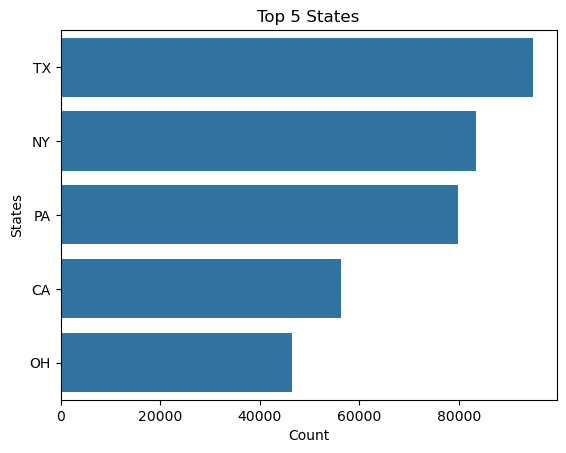

In [27]:
top_5_states = df["state"].value_counts().head()
sns.barplot(top_5_states, orient= "h")
plt.xlabel("Count")
plt.ylabel("States")
plt.title("Top 5 States");

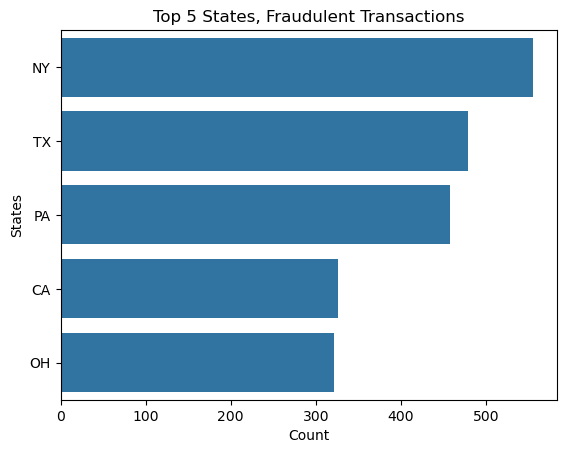

In [28]:
top_5_states_fraud = df_fraud["state"].value_counts().head()
sns.barplot(top_5_states_fraud, orient= "h")
plt.xlabel("Count")
plt.ylabel("States")
plt.title("Top 5 States, Fraudulent Transactions");

**City**

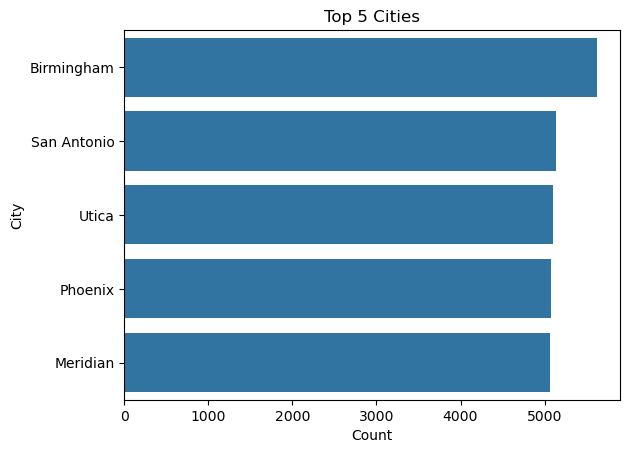

In [29]:
cities = df["city"].value_counts().head()
sns.barplot(cities, orient= "h")
plt.xlabel("Count")
plt.ylabel("City")
plt.title("Top 5 Cities");

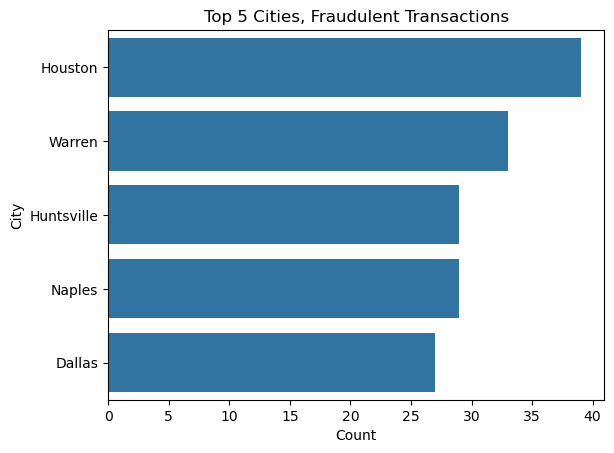

In [30]:
cities_fraud = df_fraud["city"].value_counts().head()
sns.barplot(cities_fraud, orient= "h")
plt.xlabel("Count")
plt.ylabel("City")
plt.title("Top 5 Cities, Fraudulent Transactions");

### Class Balance

In [31]:
df["is_fraud"].value_counts(normalize= True)

is_fraud
0    0.994211
1    0.005789
Name: proportion, dtype: float64

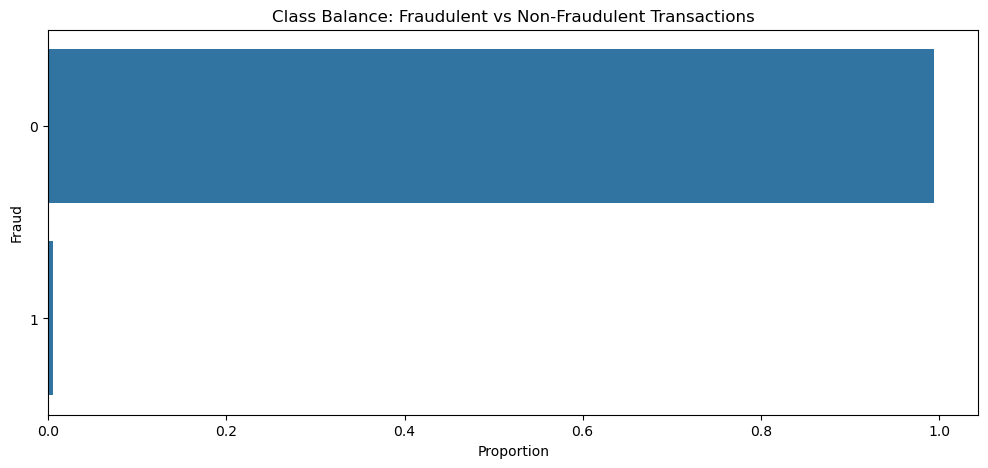

In [32]:
fraud_class = df["is_fraud"].value_counts(normalize= True).round(4)

fig, ax= plt.subplots(figsize= (12, 5))
sns.barplot(fraud_class, orient= "h", ax= ax)
plt.xlabel("Proportion")
plt.ylabel("Fraud")
plt.title("Class Balance: Fraudulent vs Non-Fraudulent Transactions");

## Summary
To conclude the EDA, let's see the following points:

* the data set has 24 features with more than 1.29 million observations,
* there is multicollinarity between features,
* there are features with high cardinality,
* the amount for fraudulent transactions mostly range from $0 to $100, from $300 to $400 and from $800 to $1000 ,
* for non-fraudulent transactions, there is no dominating category that stands out,
* for the fraudulent transactions, grocery_pos and shopping_net categories take more than 46% of the fraudulent transactions,
* customers with ages from 30 to 50 made the most non-fraudulent transactions,
* fraudulent transactions were mostly made by customers with ages from 45 to 60,
* 55% of non-fraudulent transactions were made by females, while 45% are by males,
* 54% of fraudulent transactions were made by males, while 46% are by females,
* top 5 jobs, states, and cities were identified for both the dataset and the fraudulent transaction group,
* 99.4% of the transactions are of non-fraudulent transaction and only 0.6% are fraudulent transactions.

## What is next?
* clean the dataset from outliers, multicollinear features, high and low cardinality features,
* as the data has very small number of fraudulent transactions, hence use either under sampling or over sampling to ensure class balance,
* propose predictive model that can be used for fraud detection